# Your Title Here

**Name(s)**: Jack Kalsched, Roxana Behjat

**Website Link**: 

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'

# from dsc80_utils import * # Feel free to uncomment and use this.

## Step 1: Introduction

The original dataset came in as one with 1534 rows representing different power outages across the country, and 57 columns representing different features including outage- and state-focused features.

Our question that we aimed to answer through hypothesis testing was: 

### Do states with above average GSP see a higher proportion of their power outages coming from intentional attacks?

## Step 2: Data Cleaning and Exploratory Data Analysis

In [4]:
outages = pd.read_excel('outage.xlsx')
outages.head()

,Major power outage events in the continental U.S.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,Time period: January 2000 - July 2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Regions affected: Outages reported in this dat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND


In [5]:
outages.columns = outages.iloc[4]
df = outages.iloc[6:]
df.head()

4,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
6,NaN,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
7,NaN,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
8,NaN,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
9,NaN,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
10,NaN,5,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743


In [8]:
## combining start and date columns for outage_start and outage_restoration

df = df.dropna(subset = ['OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'OUTAGE.RESTORATION.TIME'])
df['OUTAGE.START'] = pd.to_datetime(df['OUTAGE.START.DATE'].astype(str) + " " + df['OUTAGE.START.TIME'].astype(str), errors = 'coerce')
df['OUTAGE.RESTORATION'] = pd.to_datetime(df['OUTAGE.RESTORATION.DATE'].astype(str) + " " + df['OUTAGE.RESTORATION.TIME'].astype(str), errors = 'coerce')
df.head()

/var/folders/bp/l1vb_64s6tj40wftrxyjhnfm0000gn/T/ipykernel_45992/2474290989.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OUTAGE.START'] = pd.to_datetime(df['OUTAGE.START.DATE'].astype(str) + " " + df['OUTAGE.START.TIME'].astype(str), errors = 'coerce')
/var/folders/bp/l1vb_64s6tj40wftrxyjhnfm0000gn/T/ipykernel_45992/2474290989.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OUTAGE.RESTORATION'] = pd.to_datetime(df['OUTAGE.RESTORATION.DATE'].astype(str) + " " + df['OUTAGE.RESTORATION.TIME'].astype(str), errors = 'coerce')


4,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.START,OUTAGE.RESTORATION
6,NaN,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,...,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2011-07-01 17:00:00,2011-07-03 20:00:00
7,NaN,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,...,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2014-05-11 18:38:00,2014-05-11 18:39:00
8,NaN,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,...,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2010-10-26 20:00:00,2010-10-28 22:00:00
9,NaN,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,...,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2012-06-19 04:30:00,2012-06-20 23:00:00
10,NaN,5,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,...,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743,2015-07-18 02:00:00,2015-07-19 07:00:00


In [9]:
## regional means and standard deviations in outage times
df.groupby(['CLIMATE.REGION'])['OUTAGE.DURATION'].agg(['mean', 'std', 'count'])

,mean,std,count
CLIMATE.REGION,,,
Central,2701.13089,4308.398087,191
East North Central,5352.043796,11984.445544,137
Northeast,2991.656977,5228.235428,344
Northwest,1284.5,2768.511669,122
South,2846.100917,5128.905774,218
Southeast,2217.686667,3628.125321,150
Southwest,1566.136364,7384.560584,88
West,1628.331707,4709.064196,205
West North Central,696.5625,2380.592166,16


In [11]:
## exploring which regions have the highest severe weather proportion
df['is_severe_weather'] = (df['CAUSE.CATEGORY'] == 'severe weather')
df['climate_is_warm'] = (df['CLIMATE.CATEGORY'] == 'warm')
df['had_hurricane'] = (df['HURRICANE.NAMES'].notna())

display(df.groupby(['CLIMATE.REGION']).agg(
    severe_weather_prop = ('is_severe_weather', 'mean'),
    warm_climate_prop = ('climate_is_warm', 'mean'),
    num_outages = ('OUTAGE.START', 'count'))
)

,severe_weather_prop,warm_climate_prop,num_outages
CLIMATE.REGION,,,
Central,0.696335,0.130890,191
East North Central,0.759124,0.124088,137
Northeast,0.508721,0.125000,344
Northwest,0.204918,0.213115,122
South,0.486239,0.243119,218
Southeast,0.773333,0.226667,150
Southwest,0.113636,0.250000,88
West,0.326829,0.278049,205
West North Central,0.250000,0.250000,16


### Conducting univariate analysis... 

In [13]:
features = ['RES.PRICE', 'COM.PRICE', 'IND.PRICE']

import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde
import pandas as pd

fig = go.Figure()

for f in features:
    # Convert to numeric if possible
    vals = pd.to_numeric(df[f], errors="coerce").dropna()

    # Skip if column is not usable
    if vals.empty:
        print(f"Skipping non-numeric or empty column: {f}")
        continue
    
    try:
        kde = gaussian_kde(vals)
        x_range = np.linspace(vals.min(), vals.max(), 300)
        y_vals = kde(x_range)

        fig.add_trace(
            go.Scatter(
                x=x_range,
                y=y_vals,
                mode='lines',
                name=f
            )
        )
    except Exception as e:
        print(f"Skipping {f} due to error: {e}")
        continue

fig.update_layout(
    title="KDE Plot for Monthly Electricity Prices in Different Sectors",
    xaxis_title="Monthly Electricity Price",
    yaxis_title="Density",
    legend_title="Region",
    width=900,
    height=500
)

fig.show()

In [15]:
## Adding boolean features for our future hypothesis testing
df['is_intentional'] = (df['CAUSE.CATEGORY'] == 'intentional attack')
df['aa_gsp'] = (df['PC.REALGSP.REL'] > 1)

df.groupby('aa_gsp')['is_intentional'].mean().round(2)

aa_gsp
False    0.25
True     0.30
Name: is_intentional, dtype: float64

## Step 3: Assessment of Missingness

In [40]:
df['customers_affected_isna'] = (df['CUSTOMERS.AFFECTED'].isna())
df.head()

4,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.START,OUTAGE.RESTORATION,is_severe_weather,climate_is_warm,had_hurricane,is_intentional,aa_gsp,customers_affected_isna
6,NaN,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,...,8.407334,5.478743,2011-07-01 17:00:00,2011-07-03 20:00:00,True,False,False,False,True,False
7,NaN,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,...,8.407334,5.478743,2014-05-11 18:38:00,2014-05-11 18:39:00,False,False,False,True,True,True
8,NaN,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,...,8.407334,5.478743,2010-10-26 20:00:00,2010-10-28 22:00:00,True,False,False,False,True,False
9,NaN,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,...,8.407334,5.478743,2012-06-19 04:30:00,2012-06-20 23:00:00,True,False,False,False,True,False
10,NaN,5,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,...,8.407334,5.478743,2015-07-18 02:00:00,2015-07-19 07:00:00,True,True,False,False,True,False


In [46]:
obs_diff = (
    df.loc[df['customers_affected_isna'] == 1, "POPPCT_URBAN"].mean()
    - df.loc[df['customers_affected_isna'] == 0, "POPPCT_URBAN"].mean()
)
obs_diff

n_perm = 5000
perm_diffs = np.zeros(n_perm)

for i in range(n_perm):
    shuffled = np.random.permutation(df["customers_affected_isna"])
    perm_diffs[i] = (
        df.loc[shuffled == 1, "POPPCT_URBAN"].mean()
        - df.loc[shuffled == 0, "POPPCT_URBAN"].mean()
    )

perm_diffs

array([-1.09985985, -0.69694832, -0.60609605, ...,  0.07246726,
        0.15812798,  0.53900866])

In [50]:
p_value = (np.abs(perm_diffs) >= np.abs(obs_diff)).mean()

print(float(p_value.round(3)))

0.185


## Step 4: Hypothesis Testing

### The first hypothesis test we'll conduct is...

- Null hypothesis: The proportion of power outages that were caused by intentional attacks is not affected by the states' GSP.
- Alternative hypothesis: The proportion of power outages that were caused by intentional attacks is greater in states with above average GSP versus states with below average GSP. 

### For the first permutation test, we'll use a signed difference in proportions between intentional attacks in states with above average and states with below average GSP, as the test statistic. 

We'll set statistical significance to be 0.05 in this case. 

In [36]:
## Calculate observed statistic
obs_stat = (df.groupby('aa_gsp')[['is_intentional']].mean().iloc[1] - df.groupby('aa_gsp')[['is_intentional']].mean().iloc[0]).iloc[0].round(3)
print(obs_stat)

sims = []

## Simulate 1000 shuffled above average or below average GSP categorical distributions, and calculate each difference in proportion 
for _ in range(1000):
    shuffled_df = df.assign(shuffled_gsp = np.random.permutation(df['aa_gsp']))
    sims.append(float((shuffled_df.groupby('shuffled_gsp')[['is_intentional']].mean().loc[True] - shuffled_df.groupby('shuffled_gsp')[['is_intentional']].mean().loc[False]).iloc[0]))


0.051


In [37]:
p_value = np.mean(sims > obs_stat)
print(p_value)

0.01


### Because the p-value we observed through 1000 permutations, 0.01, was less than our alpha, 0.05, we therefore reject the null hypothesis. We deduce that the proportion of power outages that were caused by intentional attacks is higher in states with above average GSP.

## Step 5: Framing a Prediction Problem

In [51]:
df

4,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.START,OUTAGE.RESTORATION,is_severe_weather,climate_is_warm,had_hurricane,is_intentional,aa_gsp,customers_affected_isna
6,NaN,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,...,8.407334,5.478743,2011-07-01 17:00:00,2011-07-03 20:00:00,True,False,False,False,True,False
7,NaN,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,...,8.407334,5.478743,2014-05-11 18:38:00,2014-05-11 18:39:00,False,False,False,True,True,True
8,NaN,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,...,8.407334,5.478743,2010-10-26 20:00:00,2010-10-28 22:00:00,True,False,False,False,True,False
9,NaN,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,...,8.407334,5.478743,2012-06-19 04:30:00,2012-06-20 23:00:00,True,False,False,False,True,False
10,NaN,5,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,...,8.407334,5.478743,2015-07-18 02:00:00,2015-07-19 07:00:00,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,NaN,1527,2016,3,Idaho,ID,WECC,Northwest,1.6,warm,...,1.108066,1.108066,2016-03-08 00:00:00,2016-03-08 00:00:00,False,True,False,True,False,False
1534,NaN,1529,2016,7,Idaho,ID,WECC,Northwest,-0.3,normal,...,1.108066,1.108066,2016-07-19 15:45:00,2016-07-19 19:25:00,False,False,False,False,False,True
1535,NaN,1530,2011,12,North Dakota,ND,MRO,West North Central,-0.9,cold,...,2.401765,2.401765,2011-12-06 08:00:00,2011-12-06 20:00:00,False,False,False,False,True,False
1537,NaN,1532,2009,8,South Dakota,SD,RFC,West North Central,0.5,warm,...,1.692256,1.692256,2009-08-29 22:54:00,2009-08-29 23:53:00,False,True,False,False,False,True


## Step 6: Baseline Model

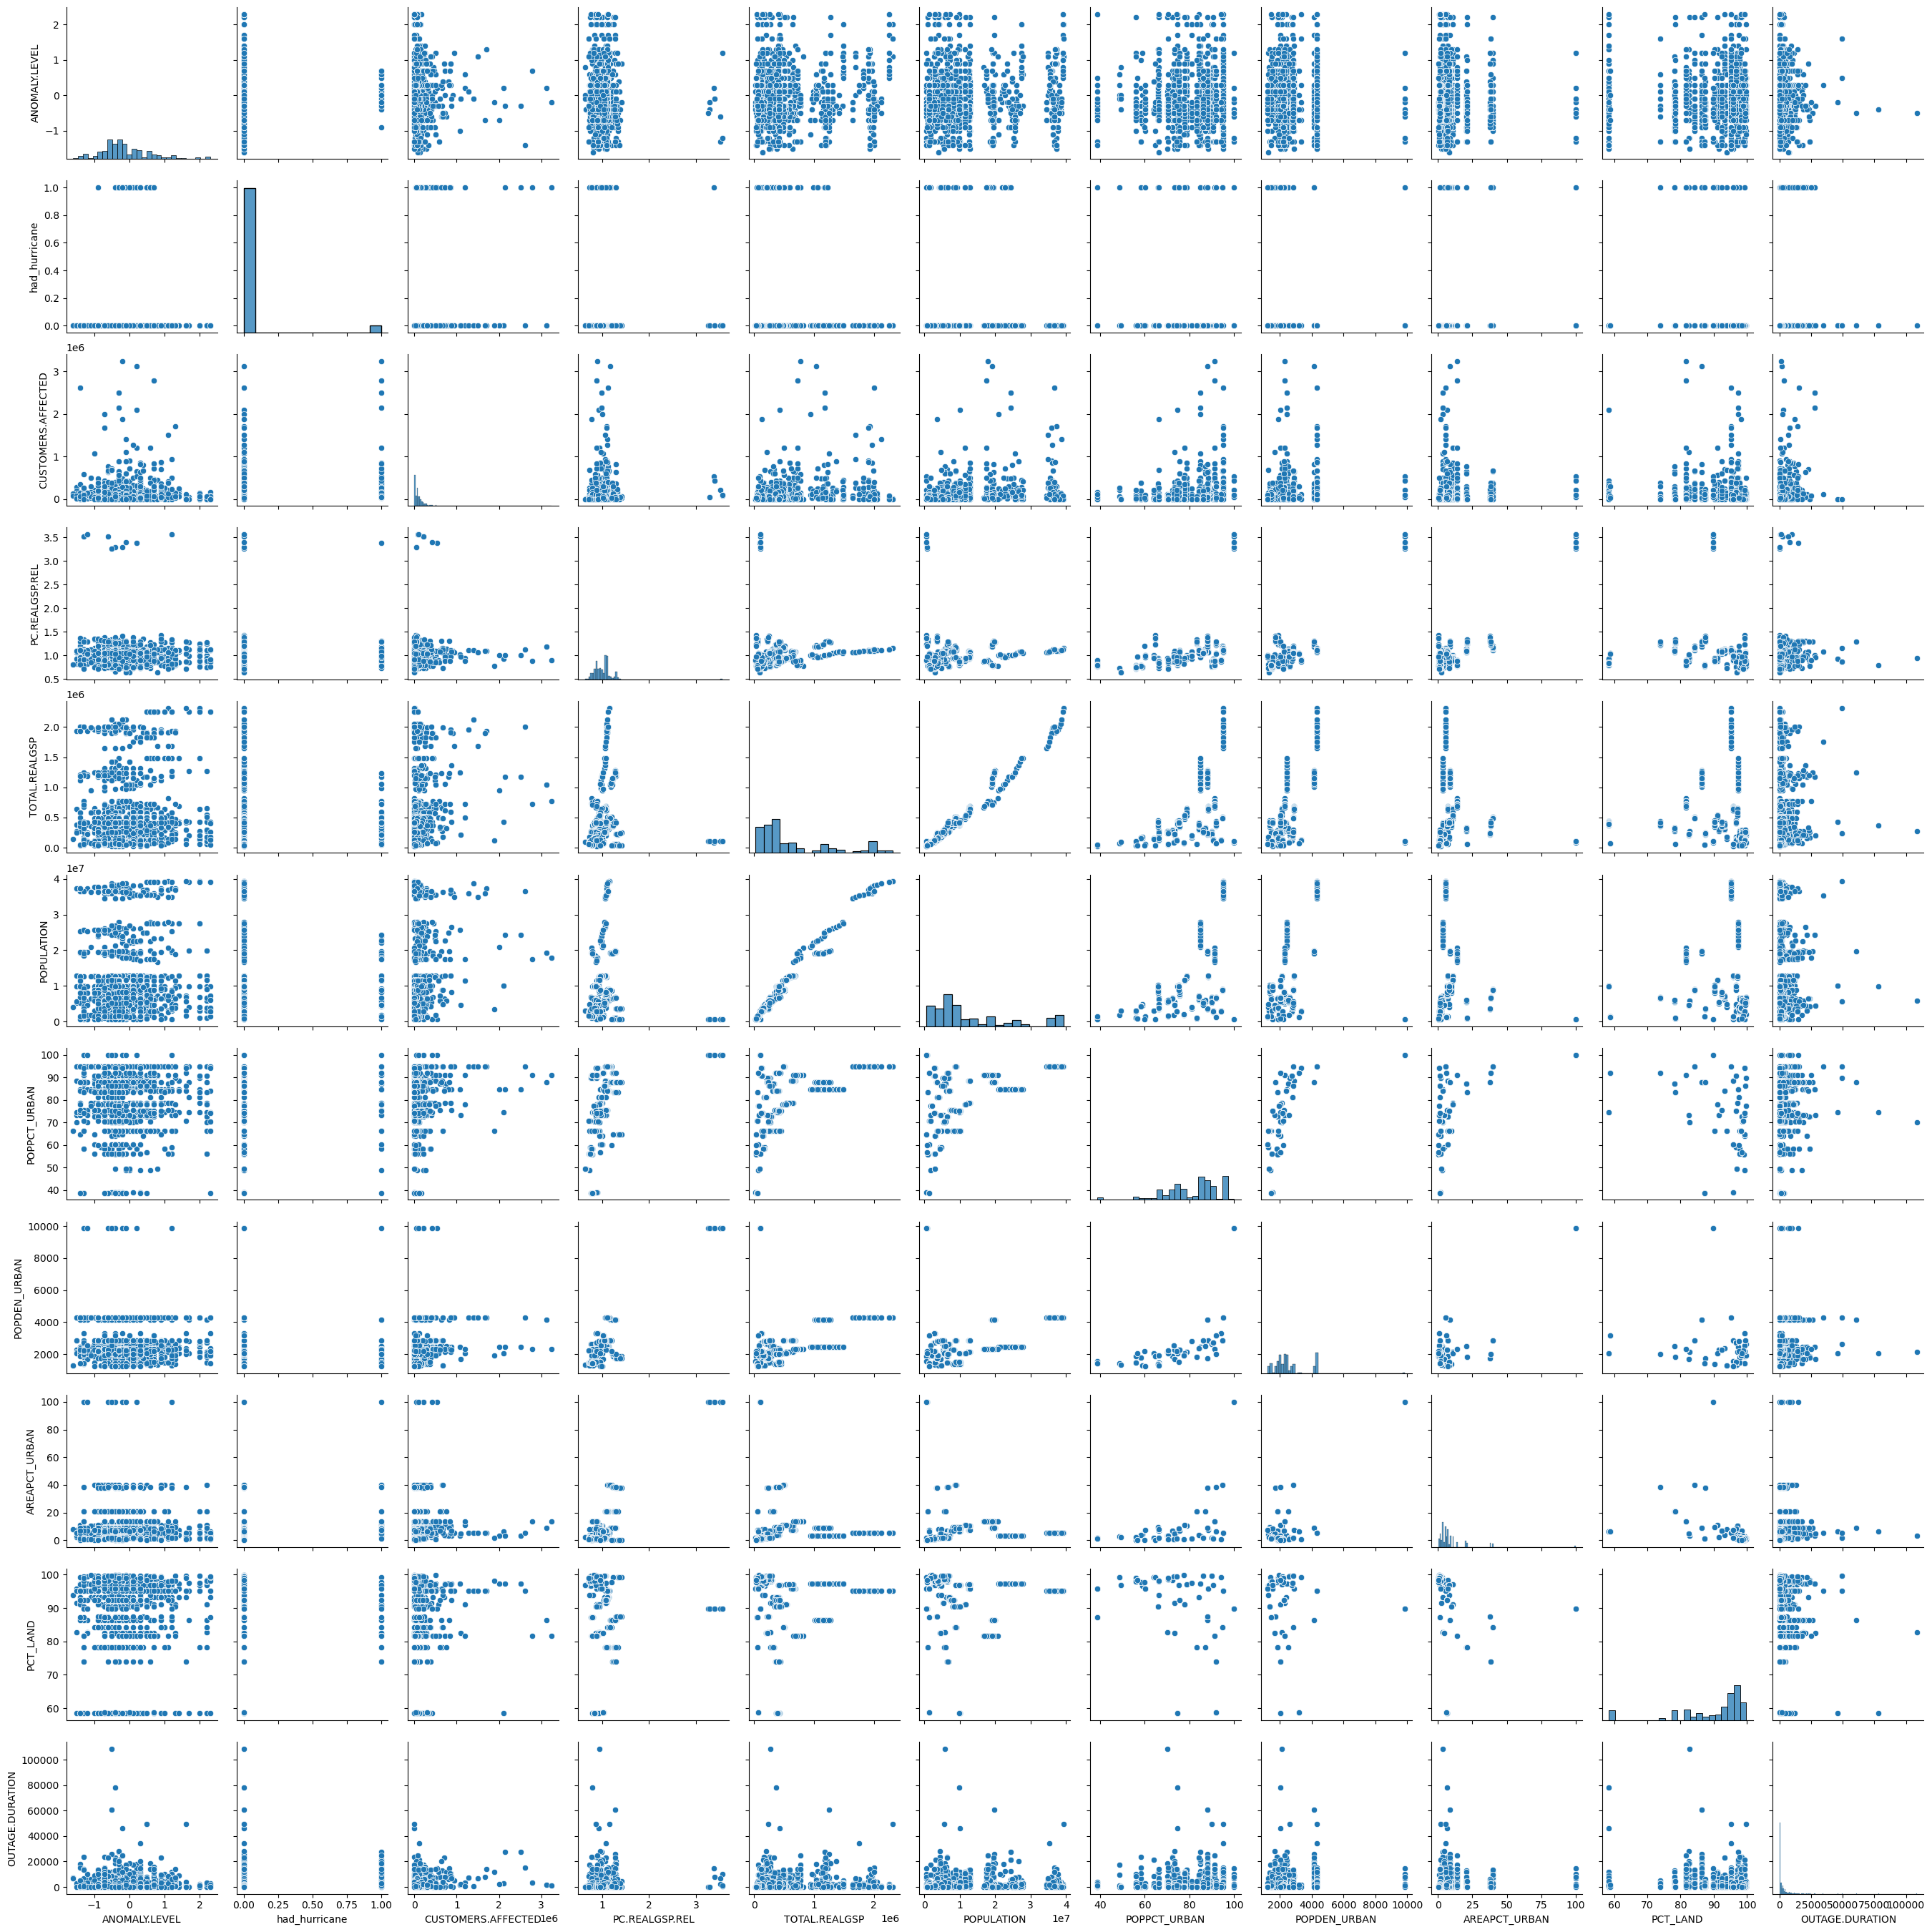

In [56]:
features = ['ANOMALY.LEVEL', 'CAUSE.CATEGORY', 'had_hurricane', 'CUSTOMERS.AFFECTED', 'PC.REALGSP.REL', 'TOTAL.REALGSP', 'POPULATION', 'POPPCT_URBAN', 'POPDEN_URBAN', 'AREAPCT_URBAN', 'PCT_LAND']

X = df[features + ['OUTAGE.DURATION']]

import seaborn as sns 

sns.pairplot(X)

### Total Real GSP and Population have a linear relationship, so we can remove Total Real GSP because it would add multicollinearity to our model. 

In [67]:
## Random Forest Regressor to predict outage duration

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('display.float_format', '{:.2f}'.format)

le = LabelEncoder()


## Preprocessing
df['cause_category_encoded'] = le.fit_transform(df['CAUSE.CATEGORY'])
df['had_hurricane'] = df['had_hurricane'] * 1

features = ['ANOMALY.LEVEL', 'cause_category_encoded', 'had_hurricane', 'CUSTOMERS.AFFECTED', 'PC.REALGSP.REL', 'POPULATION', 'POPPCT_URBAN', 'POPDEN_URBAN', 'AREAPCT_URBAN', 'PCT_LAND']
target = 'OUTAGE.DURATION'

X = df[features]
y = df[[target]]

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", round(rmse, 3))
print("R²:", round(r2, 3))


RMSE: 7440.134
R²: 0.098


/Users/jackkalsched/miniforge3/envs/dsc80/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



## Step 7: Final Model

In [ ]:
# TODO

## Step 8: Fairness Analysis

In [ ]:
# TODO